<a href="https://colab.research.google.com/github/OKHYUNJONG/CapstoneTermProject/blob/main/PreProcessing%2BModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
data_dir = '/content/drive/MyDrive/ColabNotebooks/데이터분석캡스톤디자인' #경로 지정하기
file_list = os.listdir(data_dir)
print(file_list)

['Make_data.ipynb', 'data.csv', 'Untitled1.ipynb']


In [ ]:
train_df =pd.read_csv(data_dir + '/data.csv')

In [ ]:
train_df.duplicated(["index"]).value_counts()

False    1403
True       22
dtype: int64

101 : 게임
102 : 공유기
103 : 기타
104 : 노트북
105 : 데스크탑
106 : 마우스
107 : 메모리
108 : 모니터
109 : 보조배터리
110 : 블랙박스
111 : 선풍기
112 : 세탁기
113 : 스피커
114 : 시계
115 : 에어컨
116 : 외장하드
117 : 이어폰
118 : 제습기
119 : 청소기
120 : 충전기
121 : 카메라
122 : 케이블
123 : 케이스
124 : 키보드
125 : 태블릿
126 : 티비
127 : 프린터
128 : 핸드폰
129 : 헤드폰
130 : SD카드
131 : SSD

In [ ]:
train_df.drop_duplicated(["index"])

In [ ]:
train_df

,id,index,title,category,hotdeal_place,label
0,361,2_400335,"Out of the park baseball 22 할인 41,000원 -> 10,2...",[디지털],스팀,0
1,541,2_400125,Renzo Racer,[디지털],indiegala,0
2,906,2_399669,Die Young: Prologue,[디지털],indiegala,0
3,943,2_399617,Chop Chop Princess!,[디지털],indiegala,0
4,960,2_399592,Tom Clancys Ghost Recon,[디지털],유비소프트,0
...,...,...,...,...,...,...
1420,6120,2_393251,ADATA SX8200Pro NVMe 1TB,[디지털],11번가,30
1421,7166,2_391859,SK하이닉스 SK hynix Gold S31 SSD 1TB TLC 2.5,[디지털],옥션,30
1422,7247,2_391746,Sandisk Ultra 3D NVME SSD 1TB,[디지털],롯데온][KB국민,30
1423,8529,2_390074,씨게이트 바라쿠다 510 M.2 Nvme 500gb,[디지털],11번가,30


In [ ]:
train_df["label"].value_counts()

2     236
16    187
24    153
0     147
13     76
27     74
19     51
5      45
12     43
7      42
25     36
29     29
28     27
21     26
18     26
15     24
23     23
3      23
26     20
22     19
30     18
14     17
10     14
9      12
20     10
1      10
17      9
4       8
8       7
6       7
11      6
Name: label, dtype: int64

In [ ]:
train_df.head()

,id,index,title,category,hotdeal_place,label
0,361,2_400335,"Out of the park baseball 22 할인 41,000원 -> 10,2...",[디지털],스팀,0
1,541,2_400125,Renzo Racer,[디지털],indiegala,0
2,906,2_399669,Die Young: Prologue,[디지털],indiegala,0
3,943,2_399617,Chop Chop Princess!,[디지털],indiegala,0
4,960,2_399592,Tom Clancys Ghost Recon,[디지털],유비소프트,0


title 길이 최댓값: 102
title 길이 최솟값: 3
title 길이 평균값: 21.88421052631579
title 길이 중간값: 20.0


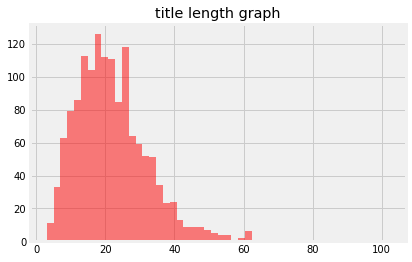

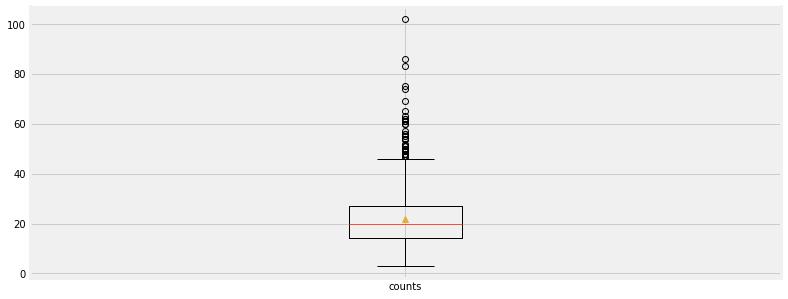

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

length=train_df['title'].astype(str).apply(len)
plt.hist(length, bins=50, alpha=0.5, color='r', label='word')
plt.title('title length graph')
plt.figure(figsize=(12, 5))
plt.boxplot(length, labels=['counts'], showmeans=True)
print('title 길이 최댓값: {}'.format(np.max(length)))
print('title 길이 최솟값: {}'.format(np.min(length)))
print('title 길이 평균값: {}'.format(np.mean(length)))
print('title 길이 중간값: {}'.format(np.median(length)))

In [ ]:
from collections import Counter

def count_words(i,col):
  print("label:",i)
  train_label=train_df[train_df['label'] == i]
  train_label=train_label[[col,'label']]
  train_tmp = train_label[[col]]

  to_txt = '' 
  for i in range(len(train_label)): 
    to_txt += str(train_tmp.iloc[i,0]) + '\n'
    
  with open('train.txt', 'w', encoding='utf-8') as f: 
    f.write(to_txt)

  with open('train.txt', 'r') as f:
      words = [w.strip('.,') for w in f.read().split()]
      print("총 문장의 갯수:",len(train_label))
      for w, c in Counter(words).most_common(50):
          print(w, c)
  print("")
  print("---------------------------------")

In [ ]:
for i in range(0,31):
  count_words(i,"title")

label: 0
총 문장의 갯수: 147
/ 33
- 14
The 14
2 10
닌텐도 9
of 7
할인 6
에디션 6
Battlefield 6
Leisure 6
Suit 6
Larry 6
the 5
스위치 5
Edition 5
게임 4
4 4
Island 4
오브 4
세일 3
Complete 3
1 3
Syberia 3
II 3
Minion 3
Masters 3
Collection 3
Assault 3
Syndicate 3
Return 3
to 3
Mysterious 3
XBOX 3
Company 3
Witcher 3
한글판 3
링피트 3
라스트 3
어스 3
Out 2
22 2
Chop 2
Ghost 2
Recon 2
동물의숲 2
Horizon 2
Hell 2
ONE 2
I 2
THE 2

---------------------------------
label: 1
총 문장의 갯수: 10
ASUS 4
유무선공유기 4
공유기 2
iptime 2
asus 1
zenwifi 1
xt8공유기 1
Netgear 1
RAX20 1
AX1800 1
Router 1
아수스 1
ax88u 1
아이피타임 1
AX2004BCM 1
RT-AX88U 1
RT-AX82U 1
외35%할인 1
TUF 1
Gaming 1
AX3000 1
기가 1
와이파이 1
WiFi 1
기가비트 1
무선 1
라우터 1
AC2900 1
| 1
Dual-Band 1
A8004t-xr 1

---------------------------------
label: 2
총 문장의 갯수: 236
+ 9
4K 8
2세대 8
필립스 8
TiVo 7
Stream 7
무선 7
[디지 6
삼성 6
공기청정기 6
1+1 6
샤오미 6
PF50KA 6
오큘러스 5
애플펜슬 5
/ 5
크롬캐스트 5
식기세척기 5
빔프로젝터 5
프로 4
스마트 4
4 4
무료 4
및 4
브라운 4
에어랩 4
컴플리트 4
커피머신 4
1200 4
EP1224/03 4
플러스 3
휴대용 3
면도기 3
Xbox 3
LED 3
도어락 3
DJI 3
로지

In [ ]:
train_df['title'] = train_df['title'] + train_df['category']

In [ ]:
import re
s1 = re.compile('1+1')
s2 = re.compile('역대가')
p = re.compile('[\!@#$%\^&\*\(\)\-\=\[\]\{\}\.,/\?~\+\'"|_:;><`┃…]')

def remove_special_characters(sentence, lower=True):
    sentence = s1.sub(' ', str(sentence))
    sentence = p.sub(' ', sentence) 
    sentence = s1.sub(' ', sentence)
    sentence = ' '.join(sentence.split())
    if lower:
        sentence = sentence.lower()
    return sentence

train_df['title'] = train_df['title'].map(remove_special_characters)
train_df.head() 

,id,index,title,category,hotdeal_place,label
0,361,2_400335,out of the park baseball 22 할인 41 000원 10 250원...,[디지털],스팀,0
1,541,2_400125,renzo racer 디지털,[디지털],indiegala,0
2,906,2_399669,die young prologue 디지털,[디지털],indiegala,0
3,943,2_399617,chop chop princess 디지털,[디지털],indiegala,0
4,960,2_399592,tom clancys ghost recon 디지털,[디지털],유비소프트,0


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold

folds = StratifiedKFold(n_splits=10, random_state=8, shuffle=True)
train_idx, valid_idx = list(folds.split(train_df.values, train_df['label']))[0]
train = train_df.iloc[train_idx]
valid = train_df.iloc[valid_idx]

# 1.Fasttext

In [ ]:
!pip install fasttext
!git clone https://github.com/facebookresearch/fastText

     |████████████████████████████████| 68 kB 5.2 MB/s 
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3121238 sha256=591c8d10f335096a6b6a0dd19afc4cf98fc07becd5ca2ff744b49ca8cb5198ad
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext
Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 29.76 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [ ]:
import fasttext
from tqdm import tqdm

In [ ]:
train2 = train[['title']]
train3 = train[['label']]

In [ ]:
train2.head()

,title
1,renzo racer 디지털
2,die young prologue 디지털
3,chop chop princess 디지털
4,tom clancys ghost recon 디지털
5,ghost recon wildlands fallen ghosts 디지털


In [ ]:
to_txt = '' 
for i in tqdm(range(len(train))): 
  to_txt += "__label__"+str(train3.iloc[i,0])+" "+ str(train2.iloc[i,0]) + '\n'

100%|██████████| 1282/1282 [00:00<00:00, 21544.33it/s]


In [ ]:
with open('train.txt', 'w', encoding='utf-8') as f: 
  f.write(to_txt)

In [ ]:
model = fasttext.train_supervised('train.txt', wordNgrams=2, epoch=120, lr=0.1)

def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('train.txt'))

print (model.predict("에어팟 프로"))

model.save_model("fasttext_model.bin")

valid2 = valid[['title']]
valid3 = valid[['label']]

cnt = 0
for i in tqdm(range(len(valid))): 
  tmp_str = str(valid2.iloc[i,0]).replace("\n", "")
  a = model.predict(tmp_str)
  a = a[0][0]
  if len(a) == 10:
    pred = int(a[-1])
    if pred != valid3.iloc[i,0]:
      cnt +=1
  else:
    pred = int(a[-2:])
    if pred != valid3.iloc[i,0]:
      cnt +=1

N	1282
P@1	0.998
R@1	0.998
(('__label__16',), array([0.99592078]))


100%|██████████| 143/143 [00:00<00:00, 11895.55it/s]


In [ ]:
print("acc: ",(len(valid) - cnt)/len(valid))

acc:  0.7902097902097902


## Score정리



(%)|Fasttext (Ngrams=2, epoch=10, lr=0.5) | Fasttext (Ngrams=2, epoch=50, lr=0.1)|Fasttext (Ngrams=2, epoch=120, lr=0.1|Fasttext (Ngrams=2, epoch=80, lr=0.1| 
---|---|---|---|---| 
`validate acc` | 0.636 | 0.713 | *0.804 | 0.797 | 

# 2.Attention이용 모델

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 9.2 MB/s 
     |████████████████████████████████| 596 kB 54.1 MB/s 
     |████████████████████████████████| 895 kB 69.6 MB/s 
     |████████████████████████████████| 3.3 MB 63.4 MB/s 
     |████████████████████████████████| 56 kB 5.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel,BertTokenizerFast, AlbertModel, BertModel, AutoTokenizer
from transformers import BertModel, RobertaTokenizer
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup, get_linear_schedule_with_warmup

In [ ]:
class CategoryDataset(Dataset):
  def __init__(self, subjects, targets, tokenizer, max_len):
    self.subjects = subjects
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.subjects)
  def __getitem__(self, item):
    subject = str(self.subjects[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      subject,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding = 'max_length',
      truncation = True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'subject_text': subject,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }
def create_data_loader(df, tokenizer, max_len, batch_size, shuffle_=False, valid=False):
  if valid:
    ds = CategoryDataset(
      subjects=df.title.to_numpy(),
      targets=df.label.to_numpy(),
      tokenizer=tokenizer,
      max_len=max_len
      )
  else:
    ds = CategoryDataset(
      subjects=df.title.to_numpy(),
      targets=df.label.to_numpy(),
      tokenizer=tokenizer,
      max_len=max_len
    )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4,
    shuffle = shuffle_
  )

In [ ]:
from sklearn.metrics import f1_score
import time
import math
import random
import argparse

def calc_review_acc(pred, label):
    _, idx = pred.max(1)
    
    acc = torch.eq(idx, label).sum().item() / idx.size()[0] #batchsize
    x = label.cpu().numpy()
    y = idx.cpu().numpy()
    f1_acc = f1_score(x, y, average='macro')
    return acc,f1_acc




class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


## (1) bert-kor-base

In [ ]:
tokenizer_bert_kor_base = BertTokenizerFast.from_pretrained("kykim/bert-kor-base")
BATCH_SIZE =128
MAX_LEN =64
train_data_loader = create_data_loader(train, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(valid, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, valid=True)

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

In [ ]:
class ReviewClassifier(nn.Module):
  def __init__(self, n_classes):
    super(ReviewClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("kykim/bert-kor-base")
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
       return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

device = torch.device("cuda")

def get_predictions(model, data_loader):
  model = model.eval()
  subject_texts = []
  predictions = []
  prediction_probs = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["subject_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      subject_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return subject_texts, predictions, prediction_probs


In [ ]:
import gc


EPOCHS = 30
model_bert_kor_base = ReviewClassifier(n_classes=31).to(device)
optimizer = AdamW(model_bert_kor_base.parameters(), lr=3e-5)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_cosine_schedule_with_warmup(
  optimizer,
  num_warmup_steps=int(total_steps*0.1),
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):

  batch_time = AverageMeter()     
  data_time = AverageMeter()      
  losses = AverageMeter()         
  accuracies = AverageMeter()
  f1_accuracies = AverageMeter()
  
  sent_count = AverageMeter()   
    

  start = end = time.time()

  model = model.train()
  correct_predictions = 0
  for step,d in enumerate(data_loader):
    data_time.update(time.time() - end)
    batch_size = d["input_ids"].size(0) 

    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.update(loss.item(), batch_size)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    batch_time.update(time.time() - end)
    end = time.time()

    sent_count.update(batch_size)
    if step % 4 == 0 or step == (len(data_loader)-1):
                acc,f1_acc = calc_review_acc(outputs, targets)
                accuracies.update(acc, batch_size)
                f1_accuracies.update(f1_acc, batch_size)

                
                print('Epoch: [{0}][{1}/{2}] '
                      'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                      'Elapsed {remain:s} '
                      'Loss: {loss.val:.3f}({loss.avg:.3f}) '
                      'Acc: {acc.val:.3f}({acc.avg:.3f}) '   
                      'f1_Acc: {f1_acc.val:.3f}({f1_acc.avg:.3f}) '           
                      'sent/s {sent_s:.0f} '
                      .format(
                      epoch, step+1, len(data_loader),
                      data_time=data_time, loss=losses,
                      acc=accuracies,
                      f1_acc=f1_accuracies,
                      remain=timeSince(start, float(step+1)/len(data_loader)),
                      sent_s=sent_count.avg/batch_time.avg
                      ))

  return correct_predictions.double() / n_examples, losses.avg

def validate(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
  return correct_predictions.double() / n_examples, np.mean(losses)

for epoch in range(EPOCHS):
  print('-' * 10)
  print(f'Epoch {epoch}/{EPOCHS-1}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_bert_kor_base,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  validate_acc, validate_loss = validate(
    model_bert_kor_base,
    valid_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(valid)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  print(f'Validate loss {validate_loss} accuracy {validate_acc}')
  print("")
  print("")


----------
Epoch 0/29
----------
Epoch: [0][1/11] Data 0.237 (0.237) Elapsed 0m 0s (remain 0m 9s) Loss: 3.485(3.485) Acc: 0.008(0.008) f1_Acc: 0.001(0.001) sent/s 134 
Epoch: [0][5/11] Data 0.002 (0.050) Elapsed 0m 3s (remain 0m 4s) Loss: 3.446(3.493) Acc: 0.000(0.004) f1_Acc: 0.000(0.000) sent/s 171 
Epoch: [0][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 3.374(3.450) Acc: 0.016(0.008) f1_Acc: 0.002(0.001) sent/s 176 
Epoch: [0][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 3.710(3.437) Acc: 0.000(0.008) f1_Acc: 0.000(0.001) sent/s 175 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 3.4367865489537186 accuracy 0.015600624024960999
Validate loss 3.2959619760513306 accuracy 0.1958041958041958


----------
Epoch 1/29
----------


Epoch: [1][1/11] Data 0.238 (0.238) Elapsed 0m 0s (remain 0m 9s) Loss: 3.177(3.177) Acc: 0.133(0.133) f1_Acc: 0.025(0.025) sent/s 137 
Epoch: [1][5/11] Data 0.002 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 3.084(3.158) Acc: 0.172(0.152) f1_Acc: 0.021(0.023) sent/s 171 
Epoch: [1][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 3.011(3.098) Acc: 0.164(0.156) f1_Acc: 0.011(0.019) sent/s 176 
Epoch: [1][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 2.828(3.078) Acc: 0.000(0.155) f1_Acc: 0.000(0.019) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

Train loss 3.0777090945965413 accuracy 0.15366614664586584
Validate loss 3.125460624694824 accuracy 0.23776223776223776


----------
Epoch 2/29
----------


Epoch: [2][1/11] Data 0.241 (0.241) Elapsed 0m 0s (remain 0m 9s) Loss: 2.867(2.867) Acc: 0.172(0.172) f1_Acc: 0.034(0.034) sent/s 137 
Epoch: [2][5/11] Data 0.000 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 2.861(2.903) Acc: 0.234(0.203) f1_Acc: 0.056(0.045) sent/s 171 
Epoch: [2][9/11] Data 0.000 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 2.581(2.798) Acc: 0.391(0.266) f1_Acc: 0.095(0.062) sent/s 176 
Epoch: [2][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 2.381(2.780) Acc: 0.500(0.267) f1_Acc: 0.333(0.063) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

Train loss 2.779718993048586 accuracy 0.2761310452418097
Validate loss 2.7413257360458374 accuracy 0.35664335664335667


----------
Epoch 3/29
----------


Epoch: [3][1/11] Data 0.243 (0.243) Elapsed 0m 0s (remain 0m 9s) Loss: 2.689(2.689) Acc: 0.281(0.281) f1_Acc: 0.071(0.071) sent/s 136 
Epoch: [3][5/11] Data 0.002 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 2.432(2.530) Acc: 0.359(0.320) f1_Acc: 0.100(0.085) sent/s 172 
Epoch: [3][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 2.152(2.416) Acc: 0.453(0.365) f1_Acc: 0.136(0.102) sent/s 177 
Epoch: [3][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 2.302(2.374) Acc: 0.500(0.365) f1_Acc: 0.333(0.103) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

Train loss 2.373577809742944 accuracy 0.41107644305772234
Validate loss 2.2471266984939575 accuracy 0.4965034965034965


----------
Epoch 4/29
----------


Epoch: [4][1/11] Data 0.239 (0.239) Elapsed 0m 0s (remain 0m 9s) Loss: 2.158(2.158) Acc: 0.445(0.445) f1_Acc: 0.156(0.156) sent/s 137 
Epoch: [4][5/11] Data 0.003 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 1.831(1.956) Acc: 0.508(0.477) f1_Acc: 0.131(0.144) sent/s 171 
Epoch: [4][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 1.596(1.900) Acc: 0.633(0.529) f1_Acc: 0.266(0.184) sent/s 176 
Epoch: [4][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.577(1.880) Acc: 1.000(0.531) f1_Acc: 1.000(0.189) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 1.880099973235971 accuracy 0.531201248049922
Validate loss 1.841935634613037 accuracy 0.6083916083916084


----------
Epoch 5/29
----------


Epoch: [5][1/11] Data 0.232 (0.232) Elapsed 0m 0s (remain 0m 9s) Loss: 1.562(1.562) Acc: 0.625(0.625) f1_Acc: 0.350(0.350) sent/s 139 
Epoch: [5][5/11] Data 0.002 (0.049) Elapsed 0m 3s (remain 0m 4s) Loss: 1.307(1.515) Acc: 0.703(0.664) f1_Acc: 0.332(0.341) sent/s 173 
Epoch: [5][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 1.368(1.470) Acc: 0.688(0.672) f1_Acc: 0.414(0.365) sent/s 177 
Epoch: [5][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 2.181(1.449) Acc: 0.500(0.671) f1_Acc: 0.333(0.365) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 1.4487543771865774 accuracy 0.6739469578783152
Validate loss 1.3812206387519836 accuracy 0.7062937062937062


----------
Epoch 6/29
----------


Epoch: [6][1/11] Data 0.243 (0.243) Elapsed 0m 0s (remain 0m 9s) Loss: 1.066(1.066) Acc: 0.820(0.820) f1_Acc: 0.487(0.487) sent/s 137 
Epoch: [6][5/11] Data 0.003 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 1.167(1.116) Acc: 0.758(0.789) f1_Acc: 0.480(0.483) sent/s 172 
Epoch: [6][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.950(1.087) Acc: 0.781(0.786) f1_Acc: 0.423(0.463) sent/s 176 
Epoch: [6][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.848(1.097) Acc: 1.000(0.788) f1_Acc: 1.000(0.466) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

Train loss 1.0965844759145134 accuracy 0.7550702028081123
Validate loss 1.1035887002944946 accuracy 0.7342657342657343


----------
Epoch 7/29
----------


Epoch: [7][1/11] Data 0.253 (0.253) Elapsed 0m 0s (remain 0m 9s) Loss: 0.997(0.997) Acc: 0.781(0.781) f1_Acc: 0.424(0.424) sent/s 135 
Epoch: [7][5/11] Data 0.002 (0.054) Elapsed 0m 3s (remain 0m 4s) Loss: 0.948(0.924) Acc: 0.805(0.793) f1_Acc: 0.571(0.497) sent/s 171 
Epoch: [7][9/11] Data 0.002 (0.031) Elapsed 0m 6s (remain 0m 1s) Loss: 0.967(0.893) Acc: 0.789(0.792) f1_Acc: 0.528(0.507) sent/s 176 
Epoch: [7][11/11] Data 0.002 (0.027) Elapsed 0m 7s (remain 0m 0s) Loss: 0.308(0.885) Acc: 1.000(0.793) f1_Acc: 1.000(0.510) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 0.8846246800073038 accuracy 0.8096723868954758
Validate loss 0.9230117499828339 accuracy 0.8391608391608392


----------
Epoch 8/29
----------


Epoch: [8][1/11] Data 0.257 (0.257) Elapsed 0m 0s (remain 0m 9s) Loss: 0.699(0.699) Acc: 0.883(0.883) f1_Acc: 0.690(0.690) sent/s 134 
Epoch: [8][5/11] Data 0.002 (0.054) Elapsed 0m 3s (remain 0m 4s) Loss: 0.660(0.714) Acc: 0.875(0.879) f1_Acc: 0.794(0.742) sent/s 171 
Epoch: [8][9/11] Data 0.002 (0.032) Elapsed 0m 6s (remain 0m 1s) Loss: 0.700(0.695) Acc: 0.844(0.867) f1_Acc: 0.725(0.736) sent/s 176 
Epoch: [8][11/11] Data 0.002 (0.027) Elapsed 0m 7s (remain 0m 0s) Loss: 1.778(0.684) Acc: 0.500(0.865) f1_Acc: 0.333(0.734) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

Train loss 0.6838029107883828 accuracy 0.8634945397815913
Validate loss 0.8265059888362885 accuracy 0.8391608391608392


----------
Epoch 9/29
----------


Epoch: [9][1/11] Data 0.250 (0.250) Elapsed 0m 0s (remain 0m 9s) Loss: 0.680(0.680) Acc: 0.891(0.891) f1_Acc: 0.750(0.750) sent/s 135 
Epoch: [9][5/11] Data 0.003 (0.053) Elapsed 0m 3s (remain 0m 4s) Loss: 0.493(0.539) Acc: 0.906(0.898) f1_Acc: 0.779(0.765) sent/s 171 
Epoch: [9][9/11] Data 0.002 (0.031) Elapsed 0m 6s (remain 0m 1s) Loss: 0.608(0.544) Acc: 0.914(0.904) f1_Acc: 0.801(0.777) sent/s 176 
Epoch: [9][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.345(0.538) Acc: 1.000(0.904) f1_Acc: 1.000(0.778) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

Train loss 0.538480505881927 accuracy 0.9087363494539782
Validate loss 0.7105613648891449 accuracy 0.8741258741258742


----------
Epoch 10/29
----------


Epoch: [10][1/11] Data 0.246 (0.246) Elapsed 0m 0s (remain 0m 9s) Loss: 0.502(0.502) Acc: 0.914(0.914) f1_Acc: 0.766(0.766) sent/s 136 
Epoch: [10][5/11] Data 0.000 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 0.347(0.437) Acc: 0.938(0.926) f1_Acc: 0.845(0.806) sent/s 172 
Epoch: [10][9/11] Data 0.000 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.376(0.421) Acc: 0.945(0.932) f1_Acc: 0.885(0.832) sent/s 177 
Epoch: [10][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.122(0.423) Acc: 1.000(0.933) f1_Acc: 1.000(0.833) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

Train loss 0.422963326544081 accuracy 0.9290171606864275
Validate loss 0.7801004350185394 accuracy 0.8671328671328671


----------
Epoch 11/29
----------


Epoch: [11][1/11] Data 0.276 (0.276) Elapsed 0m 0s (remain 0m 9s) Loss: 0.434(0.434) Acc: 0.906(0.906) f1_Acc: 0.852(0.852) sent/s 129 
Epoch: [11][5/11] Data 0.002 (0.059) Elapsed 0m 3s (remain 0m 4s) Loss: 0.394(0.393) Acc: 0.922(0.914) f1_Acc: 0.789(0.820) sent/s 169 
Epoch: [11][9/11] Data 0.002 (0.034) Elapsed 0m 6s (remain 0m 1s) Loss: 0.267(0.372) Acc: 0.984(0.938) f1_Acc: 0.950(0.864) sent/s 175 
Epoch: [11][11/11] Data 0.002 (0.029) Elapsed 0m 7s (remain 0m 0s) Loss: 0.098(0.362) Acc: 1.000(0.938) f1_Acc: 1.000(0.864) sent/s 175 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.3616469197916724 accuracy 0.9422776911076444
Validate loss 0.7198164761066437 accuracy 0.8671328671328671


----------
Epoch 12/29
----------


Epoch: [12][1/11] Data 0.241 (0.241) Elapsed 0m 0s (remain 0m 9s) Loss: 0.311(0.311) Acc: 0.938(0.938) f1_Acc: 0.851(0.851) sent/s 137 
Epoch: [12][5/11] Data 0.005 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.321(0.304) Acc: 0.961(0.949) f1_Acc: 0.917(0.884) sent/s 172 
Epoch: [12][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 0.257(0.303) Acc: 0.977(0.958) f1_Acc: 0.893(0.887) sent/s 177 
Epoch: [12][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.233(0.296) Acc: 1.000(0.959) f1_Acc: 1.000(0.887) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.2964740345565466 accuracy 0.9563182527301093
Validate loss 0.6143944263458252 accuracy 0.9020979020979021


----------
Epoch 13/29
----------


Epoch: [13][1/11] Data 0.241 (0.241) Elapsed 0m 0s (remain 0m 9s) Loss: 0.277(0.277) Acc: 0.945(0.945) f1_Acc: 0.821(0.821) sent/s 136 
Epoch: [13][5/11] Data 0.000 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.259(0.253) Acc: 0.977(0.961) f1_Acc: 0.932(0.876) sent/s 171 
Epoch: [13][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.230(0.251) Acc: 0.977(0.966) f1_Acc: 0.917(0.890) sent/s 176 
Epoch: [13][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.082(0.247) Acc: 1.000(0.966) f1_Acc: 1.000(0.891) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

Train loss 0.2466540405419241 accuracy 0.9711388455538222
Validate loss 0.6704682856798172 accuracy 0.8951048951048951


----------
Epoch 14/29
----------


Epoch: [14][1/11] Data 0.241 (0.241) Elapsed 0m 0s (remain 0m 9s) Loss: 0.231(0.231) Acc: 0.992(0.992) f1_Acc: 0.987(0.987) sent/s 137 
Epoch: [14][5/11] Data 0.004 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.215(0.239) Acc: 0.977(0.984) f1_Acc: 0.945(0.966) sent/s 171 
Epoch: [14][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.212(0.232) Acc: 0.992(0.987) f1_Acc: 0.990(0.974) sent/s 176 
Epoch: [14][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.053(0.229) Acc: 1.000(0.987) f1_Acc: 1.000(0.974) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

Train loss 0.2292697259897654 accuracy 0.9703588143525741
Validate loss 0.5279688090085983 accuracy 0.916083916083916


----------
Epoch 15/29
----------


Epoch: [15][1/11] Data 0.252 (0.252) Elapsed 0m 0s (remain 0m 9s) Loss: 0.158(0.158) Acc: 0.992(0.992) f1_Acc: 0.998(0.998) sent/s 135 
Epoch: [15][5/11] Data 0.000 (0.054) Elapsed 0m 3s (remain 0m 4s) Loss: 0.142(0.188) Acc: 0.977(0.984) f1_Acc: 0.966(0.982) sent/s 171 
Epoch: [15][9/11] Data 0.002 (0.031) Elapsed 0m 6s (remain 0m 1s) Loss: 0.200(0.180) Acc: 0.992(0.987) f1_Acc: 0.982(0.982) sent/s 176 
Epoch: [15][11/11] Data 0.002 (0.027) Elapsed 0m 7s (remain 0m 0s) Loss: 0.136(0.181) Acc: 1.000(0.987) f1_Acc: 1.000(0.982) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.18064232521607612 accuracy 0.9789391575663027
Validate loss 0.6842426061630249 accuracy 0.8881118881118881


----------
Epoch 16/29
----------


Epoch: [16][1/11] Data 0.262 (0.262) Elapsed 0m 0s (remain 0m 9s) Loss: 0.244(0.244) Acc: 0.961(0.961) f1_Acc: 0.955(0.955) sent/s 134 
Epoch: [16][5/11] Data 0.003 (0.055) Elapsed 0m 3s (remain 0m 4s) Loss: 0.143(0.173) Acc: 1.000(0.980) f1_Acc: 1.000(0.977) sent/s 171 
Epoch: [16][9/11] Data 0.002 (0.032) Elapsed 0m 6s (remain 0m 1s) Loss: 0.160(0.165) Acc: 0.969(0.977) f1_Acc: 0.916(0.957) sent/s 176 
Epoch: [16][11/11] Data 0.002 (0.027) Elapsed 0m 7s (remain 0m 0s) Loss: 0.187(0.161) Acc: 1.000(0.977) f1_Acc: 1.000(0.957) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

Train loss 0.16050635745484446 accuracy 0.984399375975039
Validate loss 0.5927622020244598 accuracy 0.8951048951048951


----------
Epoch 17/29
----------


Epoch: [17][1/11] Data 0.233 (0.233) Elapsed 0m 0s (remain 0m 9s) Loss: 0.224(0.224) Acc: 0.969(0.969) f1_Acc: 0.960(0.960) sent/s 138 
Epoch: [17][5/11] Data 0.000 (0.050) Elapsed 0m 3s (remain 0m 4s) Loss: 0.123(0.156) Acc: 0.984(0.977) f1_Acc: 0.919(0.939) sent/s 172 
Epoch: [17][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 0.122(0.143) Acc: 0.992(0.982) f1_Acc: 0.988(0.956) sent/s 177 
Epoch: [17][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.212(0.140) Acc: 1.000(0.982) f1_Acc: 1.000(0.956) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.13969248563469666 accuracy 0.9875195007800313
Validate loss 0.650708481669426 accuracy 0.8951048951048951


----------
Epoch 18/29
----------


Epoch: [18][1/11] Data 0.238 (0.238) Elapsed 0m 0s (remain 0m 9s) Loss: 0.126(0.126) Acc: 0.984(0.984) f1_Acc: 0.969(0.969) sent/s 137 
Epoch: [18][5/11] Data 0.003 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.107(0.108) Acc: 0.992(0.988) f1_Acc: 0.978(0.973) sent/s 172 
Epoch: [18][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.079(0.114) Acc: 1.000(0.992) f1_Acc: 1.000(0.982) sent/s 177 
Epoch: [18][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.052(0.121) Acc: 1.000(0.992) f1_Acc: 1.000(0.982) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

Train loss 0.12142129397592195 accuracy 0.9882995319812793
Validate loss 0.6257889568805695 accuracy 0.9020979020979021


----------
Epoch 19/29
----------


Epoch: [19][1/11] Data 0.245 (0.245) Elapsed 0m 0s (remain 0m 9s) Loss: 0.103(0.103) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 136 
Epoch: [19][5/11] Data 0.002 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 0.174(0.132) Acc: 0.977(0.988) f1_Acc: 0.953(0.976) sent/s 171 
Epoch: [19][9/11] Data 0.002 (0.031) Elapsed 0m 6s (remain 0m 1s) Loss: 0.088(0.112) Acc: 0.992(0.990) f1_Acc: 0.982(0.978) sent/s 176 
Epoch: [19][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.033(0.108) Acc: 1.000(0.990) f1_Acc: 1.000(0.979) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

Train loss 0.1078043208688544 accuracy 0.9906396255850234
Validate loss 0.6488160192966461 accuracy 0.9020979020979021


----------
Epoch 20/29
----------


Epoch: [20][1/11] Data 0.246 (0.246) Elapsed 0m 0s (remain 0m 9s) Loss: 0.104(0.104) Acc: 0.984(0.984) f1_Acc: 0.980(0.980) sent/s 136 
Epoch: [20][5/11] Data 0.000 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 0.102(0.116) Acc: 1.000(0.992) f1_Acc: 1.000(0.990) sent/s 171 
Epoch: [20][9/11] Data 0.002 (0.031) Elapsed 0m 6s (remain 0m 1s) Loss: 0.110(0.109) Acc: 0.984(0.990) f1_Acc: 0.963(0.981) sent/s 176 
Epoch: [20][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.395(0.106) Acc: 1.000(0.990) f1_Acc: 1.000(0.981) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.1057203844445358 accuracy 0.9914196567862715
Validate loss 0.621804267168045 accuracy 0.8881118881118881


----------
Epoch 21/29
----------


Epoch: [21][1/11] Data 0.225 (0.225) Elapsed 0m 0s (remain 0m 9s) Loss: 0.118(0.118) Acc: 0.984(0.984) f1_Acc: 0.980(0.980) sent/s 140 
Epoch: [21][5/11] Data 0.004 (0.048) Elapsed 0m 3s (remain 0m 4s) Loss: 0.116(0.096) Acc: 0.984(0.984) f1_Acc: 0.984(0.982) sent/s 172 
Epoch: [21][9/11] Data 0.002 (0.028) Elapsed 0m 6s (remain 0m 1s) Loss: 0.150(0.096) Acc: 0.977(0.982) f1_Acc: 0.969(0.978) sent/s 177 
Epoch: [21][11/11] Data 0.002 (0.024) Elapsed 0m 7s (remain 0m 0s) Loss: 0.291(0.096) Acc: 1.000(0.982) f1_Acc: 1.000(0.978) sent/s 177 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.0959028184134949 accuracy 0.9914196567862715
Validate loss 0.6311563104391098 accuracy 0.8951048951048951


----------
Epoch 22/29
----------


Epoch: [22][1/11] Data 0.243 (0.243) Elapsed 0m 0s (remain 0m 9s) Loss: 0.098(0.098) Acc: 0.992(0.992) f1_Acc: 0.993(0.993) sent/s 137 
Epoch: [22][5/11] Data 0.003 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 0.078(0.084) Acc: 0.992(0.992) f1_Acc: 0.990(0.992) sent/s 172 
Epoch: [22][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.090(0.084) Acc: 0.992(0.992) f1_Acc: 0.964(0.982) sent/s 176 
Epoch: [22][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.138(0.084) Acc: 1.000(0.992) f1_Acc: 1.000(0.982) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

Train loss 0.08393798010676588 accuracy 0.9953198127925117
Validate loss 0.6079542636871338 accuracy 0.8951048951048951


----------
Epoch 23/29
----------


Epoch: [23][1/11] Data 0.243 (0.243) Elapsed 0m 0s (remain 0m 9s) Loss: 0.089(0.089) Acc: 0.992(0.992) f1_Acc: 0.995(0.995) sent/s 136 
Epoch: [23][5/11] Data 0.003 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.078(0.083) Acc: 0.992(0.992) f1_Acc: 0.957(0.976) sent/s 172 
Epoch: [23][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.070(0.078) Acc: 1.000(0.995) f1_Acc: 1.000(0.984) sent/s 177 
Epoch: [23][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.094(0.078) Acc: 1.000(0.995) f1_Acc: 1.000(0.984) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

Train loss 0.07839714481194567 accuracy 0.9953198127925117
Validate loss 0.6142073571681976 accuracy 0.9020979020979021


----------
Epoch 24/29
----------


Epoch: [24][1/11] Data 0.226 (0.226) Elapsed 0m 0s (remain 0m 9s) Loss: 0.053(0.053) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 139 
Epoch: [24][5/11] Data 0.006 (0.049) Elapsed 0m 3s (remain 0m 4s) Loss: 0.086(0.071) Acc: 0.992(0.996) f1_Acc: 0.959(0.979) sent/s 172 
Epoch: [24][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 0.061(0.075) Acc: 1.000(0.997) f1_Acc: 1.000(0.986) sent/s 177 
Epoch: [24][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.024(0.075) Acc: 1.000(0.997) f1_Acc: 1.000(0.986) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

Train loss 0.07461473851663739 accuracy 0.9968798751950079
Validate loss 0.6223267763853073 accuracy 0.9020979020979021


----------
Epoch 25/29
----------


Epoch: [25][1/11] Data 0.240 (0.240) Elapsed 0m 0s (remain 0m 9s) Loss: 0.065(0.065) Acc: 0.992(0.992) f1_Acc: 0.960(0.960) sent/s 136 
Epoch: [25][5/11] Data 0.004 (0.051) Elapsed 0m 3s (remain 0m 4s) Loss: 0.066(0.067) Acc: 1.000(0.996) f1_Acc: 1.000(0.980) sent/s 171 
Epoch: [25][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.063(0.075) Acc: 1.000(0.997) f1_Acc: 1.000(0.987) sent/s 176 
Epoch: [25][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.029(0.074) Acc: 1.000(0.997) f1_Acc: 1.000(0.987) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

Train loss 0.07411646605258612 accuracy 0.9945397815912637
Validate loss 0.6166520714759827 accuracy 0.9020979020979021


----------
Epoch 26/29
----------


Epoch: [26][1/11] Data 0.244 (0.244) Elapsed 0m 0s (remain 0m 9s) Loss: 0.090(0.090) Acc: 0.992(0.992) f1_Acc: 0.981(0.981) sent/s 136 
Epoch: [26][5/11] Data 0.000 (0.052) Elapsed 0m 3s (remain 0m 4s) Loss: 0.057(0.080) Acc: 1.000(0.996) f1_Acc: 1.000(0.990) sent/s 171 
Epoch: [26][9/11] Data 0.000 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.083(0.074) Acc: 0.992(0.995) f1_Acc: 0.986(0.989) sent/s 177 
Epoch: [26][11/11] Data 0.002 (0.026) Elapsed 0m 7s (remain 0m 0s) Loss: 0.352(0.073) Acc: 1.000(0.995) f1_Acc: 1.000(0.989) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

Train loss 0.0730600384021884 accuracy 0.9960998439937598
Validate loss 0.62823286652565 accuracy 0.9020979020979021


----------
Epoch 27/29
----------


Epoch: [27][1/11] Data 0.233 (0.233) Elapsed 0m 0s (remain 0m 9s) Loss: 0.078(0.078) Acc: 0.992(0.992) f1_Acc: 0.990(0.990) sent/s 138 
Epoch: [27][5/11] Data 0.002 (0.050) Elapsed 0m 3s (remain 0m 4s) Loss: 0.070(0.070) Acc: 0.992(0.992) f1_Acc: 0.992(0.991) sent/s 172 
Epoch: [27][9/11] Data 0.002 (0.029) Elapsed 0m 6s (remain 0m 1s) Loss: 0.053(0.070) Acc: 1.000(0.995) f1_Acc: 1.000(0.994) sent/s 177 
Epoch: [27][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.013(0.071) Acc: 1.000(0.995) f1_Acc: 1.000(0.994) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.07059939095224493 accuracy 0.9945397815912637
Validate loss 0.6317608654499054 accuracy 0.9020979020979021


----------
Epoch 28/29
----------


Epoch: [28][1/11] Data 0.236 (0.236) Elapsed 0m 0s (remain 0m 9s) Loss: 0.076(0.076) Acc: 0.992(0.992) f1_Acc: 0.983(0.983) sent/s 137 
Epoch: [28][5/11] Data 0.000 (0.050) Elapsed 0m 3s (remain 0m 4s) Loss: 0.072(0.067) Acc: 0.992(0.992) f1_Acc: 0.990(0.986) sent/s 172 
Epoch: [28][9/11] Data 0.002 (0.030) Elapsed 0m 6s (remain 0m 1s) Loss: 0.064(0.073) Acc: 0.992(0.992) f1_Acc: 0.961(0.978) sent/s 177 
Epoch: [28][11/11] Data 0.002 (0.025) Elapsed 0m 7s (remain 0m 0s) Loss: 0.029(0.071) Acc: 1.000(0.992) f1_Acc: 1.000(0.978) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 0.07132261552137444 accuracy 0.9937597503900156
Validate loss 0.6301133334636688 accuracy 0.9020979020979021


----------
Epoch 29/29
----------


Epoch: [29][1/11] Data 0.227 (0.227) Elapsed 0m 0s (remain 0m 9s) Loss: 0.061(0.061) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 139 
Epoch: [29][5/11] Data 0.000 (0.049) Elapsed 0m 3s (remain 0m 4s) Loss: 0.057(0.062) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 172 
Epoch: [29][9/11] Data 0.000 (0.028) Elapsed 0m 6s (remain 0m 1s) Loss: 0.108(0.071) Acc: 0.992(0.997) f1_Acc: 0.996(0.999) sent/s 177 
Epoch: [29][11/11] Data 0.002 (0.024) Elapsed 0m 7s (remain 0m 0s) Loss: 0.037(0.069) Acc: 1.000(0.997) f1_Acc: 1.000(0.999) sent/s 176 


100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

Train loss 0.06925393317284152 accuracy 0.9960998439937598
Validate loss 0.6298128217458725 accuracy 0.9020979020979021




unbalance된 데이터

1. Loss의 적절한 변형
2. Oversampling 
둘 중 2부터 

### oversamlpling

In [ ]:
train = train[["index","title","label"]]

train = train.fillna("")

In [ ]:
valid = valid[["index","title","label"]]

valid = valid.fillna("")

In [ ]:
import collections
X = train.drop('label', axis = 1)
y = train.iloc[:, -1]
counter = collections.Counter(y)
print(counter)

Counter({2: 212, 16: 168, 24: 137, 0: 132, 13: 68, 27: 66, 19: 46, 5: 41, 12: 39, 7: 38, 25: 33, 29: 26, 28: 25, 18: 24, 21: 23, 15: 22, 3: 21, 23: 21, 26: 18, 22: 17, 30: 16, 14: 15, 10: 12, 9: 11, 1: 9, 20: 9, 17: 8, 4: 7, 6: 6, 8: 6, 11: 6})


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
counter = collections.Counter(y_resampled)
print(counter)

Counter({0: 212, 1: 212, 2: 212, 3: 212, 4: 212, 5: 212, 6: 212, 7: 212, 8: 212, 9: 212, 10: 212, 11: 212, 12: 212, 13: 212, 14: 212, 15: 212, 16: 212, 17: 212, 18: 212, 19: 212, 20: 212, 21: 212, 22: 212, 23: 212, 24: 212, 25: 212, 26: 212, 27: 212, 28: 212, 29: 212, 30: 212})


In [ ]:
data_res = pd.DataFrame()
data_res['index'] = X_resampled[:,0]
data_res['title'] = X_resampled[:,1]
data_res['label'] = y_resampled
train = data_res
train

,index,title,label
0,2_400125,renzo racer 디지털,0
1,2_399669,die young prologue 디지털,0
2,2_399617,chop chop princess 디지털,0
3,2_399592,tom clancys ghost recon 디지털,0
4,2_399583,ghost recon wildlands fallen ghosts 디지털,0
...,...,...,...
6567,2_397263,삼성전자 외장ssd t7 1tb 디지털,30
6568,2_390074,씨게이트 바라쿠다 510 m 2 nvme 500gb 디지털,30
6569,2_397069,sk하이닉스 gold p31 1tb 디지털,30
6570,2_400276,2021 아이맥 24 퍼플 m1 8cpu 8gpu 16gb 256ssd 디지털,30


In [ ]:
train_data_loader = create_data_loader(train, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(valid, tokenizer_bert_kor_base, MAX_LEN, BATCH_SIZE, valid=True)

In [ ]:
import gc


EPOCHS = 10
model_bert_kor_base = ReviewClassifier(n_classes=31).to(device)
optimizer = AdamW(model_bert_kor_base.parameters(), lr=3e-5)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_cosine_schedule_with_warmup(
  optimizer,
  num_warmup_steps=int(total_steps*0.1),
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

Some weights of the model checkpoint at kykim/bert-kor-base were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):

  batch_time = AverageMeter()     
  data_time = AverageMeter()      
  losses = AverageMeter()         
  accuracies = AverageMeter()
  f1_accuracies = AverageMeter()
  
  sent_count = AverageMeter()   
    

  start = end = time.time()

  model = model.train()
  correct_predictions = 0
  for step,d in enumerate(data_loader):
    data_time.update(time.time() - end)
    batch_size = d["input_ids"].size(0) 

    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.update(loss.item(), batch_size)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    batch_time.update(time.time() - end)
    end = time.time()

    sent_count.update(batch_size)
    if step % 20 == 0 or step == (len(data_loader)-1):
                acc,f1_acc = calc_review_acc(outputs, targets)
                accuracies.update(acc, batch_size)
                f1_accuracies.update(f1_acc, batch_size)

                
                print('Epoch: [{0}][{1}/{2}] '
                      'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                      'Elapsed {remain:s} '
                      'Loss: {loss.val:.3f}({loss.avg:.3f}) '
                      'Acc: {acc.val:.3f}({acc.avg:.3f}) '   
                      'f1_Acc: {f1_acc.val:.3f}({f1_acc.avg:.3f}) '           
                      'sent/s {sent_s:.0f} '
                      .format(
                      epoch, step+1, len(data_loader),
                      data_time=data_time, loss=losses,
                      acc=accuracies,
                      f1_acc=f1_accuracies,
                      remain=timeSince(start, float(step+1)/len(data_loader)),
                      sent_s=sent_count.avg/batch_time.avg
                      ))

  return correct_predictions.double() / n_examples, losses.avg

def validate(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
  return correct_predictions.double() / n_examples, np.mean(losses)

for epoch in range(EPOCHS):
  print('-' * 10)
  print(f'Epoch {epoch}/{EPOCHS-1}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_bert_kor_base,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  validate_acc, validate_loss = validate(
    model_bert_kor_base,
    valid_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(valid)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  print(f'Validate loss {validate_loss} accuracy {validate_acc}')
  print("")
  print("")

----------
Epoch 0/29
----------
Epoch: [0][1/52] Data 0.235 (0.235) Elapsed 0m 0s (remain 0m 49s) Loss: 3.487(3.487) Acc: 0.031(0.031) f1_Acc: 0.006(0.006) sent/s 133 
Epoch: [0][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 22s) Loss: 3.455(3.498) Acc: 0.039(0.035) f1_Acc: 0.016(0.011) sent/s 180 
Epoch: [0][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 3.329(3.460) Acc: 0.102(0.057) f1_Acc: 0.065(0.029) sent/s 182 
Epoch: [0][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 3.256(3.432) Acc: 0.114(0.063) f1_Acc: 0.083(0.034) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 3.432412601431477 accuracy 0.04580036518563603
Validate loss 3.252536416053772 accuracy 0.17482517482517482


----------
Epoch 1/29
----------


Epoch: [1][1/52] Data 0.225 (0.225) Elapsed 0m 0s (remain 0m 47s) Loss: 3.284(3.284) Acc: 0.094(0.094) f1_Acc: 0.077(0.077) sent/s 139 
Epoch: [1][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 2.845(3.098) Acc: 0.469(0.281) f1_Acc: 0.371(0.224) sent/s 181 
Epoch: [1][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 2.158(2.812) Acc: 0.727(0.430) f1_Acc: 0.687(0.378) sent/s 182 
Epoch: [1][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 1.675(2.629) Acc: 0.864(0.474) f1_Acc: 0.807(0.422) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 2.6291085122492133 accuracy 0.4888922702373707
Validate loss 1.9756014347076416 accuracy 0.6083916083916084


----------
Epoch 2/29
----------


Epoch: [2][1/52] Data 0.256 (0.256) Elapsed 0m 0s (remain 0m 48s) Loss: 1.690(1.690) Acc: 0.828(0.828) f1_Acc: 0.794(0.794) sent/s 134 
Epoch: [2][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 22s) Loss: 1.012(1.331) Acc: 0.898(0.863) f1_Acc: 0.841(0.817) sent/s 180 
Epoch: [2][41/52] Data 0.002 (0.009) Elapsed 0m 28s (remain 0m 7s) Loss: 0.621(1.047) Acc: 0.891(0.872) f1_Acc: 0.853(0.829) sent/s 182 
Epoch: [2][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.428(0.926) Acc: 0.955(0.881) f1_Acc: 0.944(0.841) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

Train loss 0.9255709692210013 accuracy 0.8851186853317103
Validate loss 0.864747166633606 accuracy 0.7762237762237763


----------
Epoch 3/29
----------


Epoch: [3][1/52] Data 0.229 (0.229) Elapsed 0m 0s (remain 0m 47s) Loss: 0.363(0.363) Acc: 0.961(0.961) f1_Acc: 0.948(0.948) sent/s 139 
Epoch: [3][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.319(0.305) Acc: 0.945(0.953) f1_Acc: 0.942(0.945) sent/s 181 
Epoch: [3][41/52] Data 0.003 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.154(0.252) Acc: 0.977(0.961) f1_Acc: 0.966(0.952) sent/s 182 
Epoch: [3][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.157(0.235) Acc: 0.977(0.963) f1_Acc: 0.980(0.955) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

Train loss 0.23513117707399644 accuracy 0.9697200243457091
Validate loss 0.6603798866271973 accuracy 0.8951048951048951


----------
Epoch 4/29
----------


Epoch: [4][1/52] Data 0.247 (0.247) Elapsed 0m 0s (remain 0m 48s) Loss: 0.090(0.090) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 136 
Epoch: [4][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 22s) Loss: 0.100(0.114) Acc: 0.984(0.992) f1_Acc: 0.983(0.992) sent/s 180 
Epoch: [4][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.069(0.099) Acc: 1.000(0.995) f1_Acc: 1.000(0.994) sent/s 182 
Epoch: [4][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.043(0.093) Acc: 1.000(0.995) f1_Acc: 1.000(0.995) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 0.09339097004363396 accuracy 0.9882836275106512
Validate loss 0.7368495762348175 accuracy 0.8881118881118881


----------
Epoch 5/29
----------


Epoch: [5][1/52] Data 0.228 (0.228) Elapsed 0m 0s (remain 0m 47s) Loss: 0.084(0.084) Acc: 0.992(0.992) f1_Acc: 0.993(0.993) sent/s 137 
Epoch: [5][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 22s) Loss: 0.032(0.058) Acc: 1.000(0.996) f1_Acc: 1.000(0.997) sent/s 180 
Epoch: [5][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.038(0.055) Acc: 0.992(0.995) f1_Acc: 0.983(0.992) sent/s 182 
Epoch: [5][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.025(0.052) Acc: 1.000(0.995) f1_Acc: 1.000(0.993) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.05249623066960532 accuracy 0.9928484479610469
Validate loss 0.7598369866609573 accuracy 0.8811188811188811


----------
Epoch 6/29
----------


Epoch: [6][1/52] Data 0.235 (0.235) Elapsed 0m 0s (remain 0m 47s) Loss: 0.026(0.026) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 
Epoch: [6][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.096(0.037) Acc: 0.977(0.988) f1_Acc: 0.972(0.986) sent/s 181 
Epoch: [6][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.015(0.032) Acc: 1.000(0.992) f1_Acc: 1.000(0.991) sent/s 182 
Epoch: [6][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.014(0.032) Acc: 1.000(0.993) f1_Acc: 1.000(0.992) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.69it/s]

Train loss 0.03173078497621212 accuracy 0.9957395009129641
Validate loss 0.7970761507749557 accuracy 0.8881118881118881


----------
Epoch 7/29
----------


Epoch: [7][1/52] Data 0.245 (0.245) Elapsed 0m 0s (remain 0m 48s) Loss: 0.049(0.049) Acc: 0.984(0.984) f1_Acc: 0.990(0.990) sent/s 136 
Epoch: [7][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.011(0.027) Acc: 1.000(0.992) f1_Acc: 1.000(0.995) sent/s 180 
Epoch: [7][41/52] Data 0.003 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.017(0.022) Acc: 0.992(0.992) f1_Acc: 0.989(0.993) sent/s 182 
Epoch: [7][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.021(0.019) Acc: 1.000(0.993) f1_Acc: 1.000(0.994) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 0.019494031008947425 accuracy 0.9972611077297626
Validate loss 0.8711387515068054 accuracy 0.9020979020979021


----------
Epoch 8/29
----------


Epoch: [8][1/52] Data 0.237 (0.237) Elapsed 0m 0s (remain 0m 47s) Loss: 0.029(0.029) Acc: 0.992(0.992) f1_Acc: 0.995(0.995) sent/s 137 
Epoch: [8][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.008(0.017) Acc: 1.000(0.996) f1_Acc: 1.000(0.997) sent/s 181 
Epoch: [8][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.018(0.015) Acc: 0.992(0.995) f1_Acc: 0.990(0.995) sent/s 182 
Epoch: [8][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.009(0.016) Acc: 1.000(0.995) f1_Acc: 1.000(0.996) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 0.016293115551655458 accuracy 0.9974132684114425
Validate loss 0.8125591278076172 accuracy 0.9020979020979021


----------
Epoch 9/29
----------


Epoch: [9][1/52] Data 0.247 (0.247) Elapsed 0m 0s (remain 0m 48s) Loss: 0.012(0.012) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 135 
Epoch: [9][21/52] Data 0.003 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.052(0.012) Acc: 0.992(0.996) f1_Acc: 0.992(0.996) sent/s 181 
Epoch: [9][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.006(0.013) Acc: 1.000(0.997) f1_Acc: 1.000(0.997) sent/s 182 
Epoch: [9][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.005(0.012) Acc: 1.000(0.998) f1_Acc: 1.000(0.998) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.012399725678047518 accuracy 0.9978697504564821
Validate loss 0.8015386164188385 accuracy 0.8951048951048951


----------
Epoch 10/29
----------


Epoch: [10][1/52] Data 0.246 (0.246) Elapsed 0m 0s (remain 0m 48s) Loss: 0.005(0.005) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 136 
Epoch: [10][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.020(0.012) Acc: 0.992(0.996) f1_Acc: 0.986(0.993) sent/s 181 
Epoch: [10][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.007(0.011) Acc: 1.000(0.997) f1_Acc: 1.000(0.995) sent/s 182 
Epoch: [10][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.005(0.013) Acc: 1.000(0.998) f1_Acc: 1.000(0.996) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

Train loss 0.012954818731036696 accuracy 0.9972611077297626
Validate loss 0.8035883903503418 accuracy 0.9020979020979021


----------
Epoch 11/29
----------


Epoch: [11][1/52] Data 0.235 (0.235) Elapsed 0m 0s (remain 0m 47s) Loss: 0.005(0.005) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 
Epoch: [11][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.013(0.014) Acc: 0.992(0.996) f1_Acc: 0.991(0.996) sent/s 181 
Epoch: [11][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.008(0.013) Acc: 1.000(0.997) f1_Acc: 1.000(0.997) sent/s 182 
Epoch: [11][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.004(0.012) Acc: 1.000(0.998) f1_Acc: 1.000(0.997) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

Train loss 0.011775030669480182 accuracy 0.9972611077297626
Validate loss 0.7732358872890472 accuracy 0.8951048951048951


----------
Epoch 12/29
----------


Epoch: [12][1/52] Data 0.242 (0.242) Elapsed 0m 0s (remain 0m 48s) Loss: 0.006(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [12][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.004(0.008) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 181 
Epoch: [12][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.004(0.010) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 
Epoch: [12][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.004(0.009) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 0.0094117858286718 accuracy 0.998021911138162
Validate loss 0.7160119861364365 accuracy 0.9020979020979021


----------
Epoch 13/29
----------


Epoch: [13][1/52] Data 0.240 (0.240) Elapsed 0m 0s (remain 0m 47s) Loss: 0.009(0.009) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [13][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.004(0.012) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 180 
Epoch: [13][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.005(0.017) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 
Epoch: [13][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.003(0.016) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

Train loss 0.01585186889513588 accuracy 0.9965003043213634
Validate loss 0.8320854306221008 accuracy 0.8951048951048951


----------
Epoch 14/29
----------


Epoch: [14][1/52] Data 0.232 (0.232) Elapsed 0m 0s (remain 0m 47s) Loss: 0.006(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 139 
Epoch: [14][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.007(0.010) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 181 
Epoch: [14][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.003(0.008) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 
Epoch: [14][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.003(0.008) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

Train loss 0.007988256552101896 accuracy 0.9981740718198417
Validate loss 0.8773552179336548 accuracy 0.9020979020979021


----------
Epoch 15/29
----------


Epoch: [15][1/52] Data 0.249 (0.249) Elapsed 0m 0s (remain 0m 48s) Loss: 0.018(0.018) Acc: 0.992(0.992) f1_Acc: 0.991(0.991) sent/s 136 
Epoch: [15][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.003(0.005) Acc: 1.000(0.996) f1_Acc: 1.000(0.995) sent/s 181 
Epoch: [15][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.003(0.006) Acc: 1.000(0.997) f1_Acc: 1.000(0.997) sent/s 182 
Epoch: [15][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.003(0.007) Acc: 1.000(0.998) f1_Acc: 1.000(0.997) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

Train loss 0.006943186564933298 accuracy 0.9984783931832015
Validate loss 0.8279214203357697 accuracy 0.9020979020979021


----------
Epoch 16/29
----------


Epoch: [16][1/52] Data 0.232 (0.232) Elapsed 0m 0s (remain 0m 47s) Loss: 0.011(0.011) Acc: 0.992(0.992) f1_Acc: 0.995(0.995) sent/s 138 
Epoch: [16][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.013(0.008) Acc: 0.992(0.992) f1_Acc: 0.986(0.990) sent/s 181 
Epoch: [16][41/52] Data 0.003 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.003(0.007) Acc: 1.000(0.995) f1_Acc: 1.000(0.994) sent/s 182 
Epoch: [16][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.003(0.007) Acc: 1.000(0.995) f1_Acc: 1.000(0.994) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

Train loss 0.006510003100444658 accuracy 0.9983262325015216
Validate loss 0.885341078042984 accuracy 0.9020979020979021


----------
Epoch 17/29
----------


Epoch: [17][1/52] Data 0.223 (0.223) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 140 
Epoch: [17][21/52] Data 0.002 (0.013) Elapsed 0m 14s (remain 0m 21s) Loss: 0.016(0.004) Acc: 0.992(0.996) f1_Acc: 0.963(0.981) sent/s 181 
Epoch: [17][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.003(0.007) Acc: 1.000(0.997) f1_Acc: 1.000(0.988) sent/s 182 
Epoch: [17][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.017(0.007) Acc: 1.000(0.998) f1_Acc: 1.000(0.989) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.007300241861086536 accuracy 0.9978697504564821
Validate loss 0.8647738993167877 accuracy 0.9020979020979021


----------
Epoch 18/29
----------


Epoch: [18][1/52] Data 0.243 (0.243) Elapsed 0m 0s (remain 0m 48s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [18][21/52] Data 0.002 (0.014) Elapsed 0m 14s (remain 0m 21s) Loss: 0.004(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 181 
Epoch: [18][41/52] Data 0.002 (0.008) Elapsed 0m 28s (remain 0m 7s) Loss: 0.003(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 
Epoch: [18][52/52] Data 0.002 (0.007) Elapsed 0m 36s (remain 0m 0s) Loss: 0.002(0.007) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 182 


100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

Train loss 0.00663793850060931 accuracy 0.9983262325015216
Validate loss 0.9220758080482483 accuracy 0.8951048951048951


----------
Epoch 19/29
----------


Epoch: [19][1/52] Data 0.232 (0.232) Elapsed 0m 0s (remain 0m 47s) Loss: 0.002(0.002) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 


KeyboardInterrupt: ignored

In [ ]:
def validate_matrix(model,data_loader,loss_fn,optimizer,device,scheduler):
  model = model.eval()
  losses = []
  correct_predictions = 0
  conf = np.zeros((31,31),dtype=np.int16)

  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    for i in range(len(preds)):
      conf[preds[i].item()][targets[i].item()] +=1
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

  return conf
conf = validate_matrix(
  model_bert_kor_base,
  valid_data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler
)

100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


In [ ]:
for i in conf:
  print(i)

[14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 1  1 21  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
  0  0  0  0  0  0  0]
[0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0

In [ ]:
for i in range(31):
  for j in range(31):
    cnt += conf[i][j]
  print("라벨",i,"의 정확도: ",conf[i][i]/cnt)
  cnt = 0

라벨 0 의 정확도:  0.3181818181818182
라벨 1 의 정확도:  nan
라벨 2 의 정확도:  0.84
라벨 3 의 정확도:  0.5
라벨 4 의 정확도:  0.5
라벨 5 의 정확도:  1.0
라벨 6 의 정확도:  0.5
라벨 7 의 정확도:  1.0
라벨 8 의 정확도:  nan
라벨 9 의 정확도:  0.5
라벨 10 의 정확도:  1.0
라벨 11 의 정확도:  nan
라벨 12 의 정확도:  1.0
라벨 13 의 정확도:  1.0
라벨 14 의 정확도:  1.0
라벨 15 의 정확도:  1.0
라벨 16 의 정확도:  0.9047619047619048
라벨 17 의 정확도:  nan
라벨 18 의 정확도:  1.0
라벨 19 의 정확도:  0.8333333333333334
라벨 20 의 정확도:  1.0
라벨 21 의 정확도:  1.0
라벨 22 의 정확도:  1.0
라벨 23 의 정확도:  1.0
라벨 24 의 정확도:  0.8823529411764706
라벨 25 의 정확도:  0.75
라벨 26 의 정확도:  1.0
라벨 27 의 정확도:  1.0
라벨 28 의 정확도:  1.0
라벨 29 의 정확도:  1.0
라벨 30 의 정확도:  1.0


## Funnel-kor-base (pretrained)

### oversampling Version

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel,BertTokenizerFast,FunnelTokenizerFast, FunnelModel, BertModel, AutoTokenizer

tokenizer_funnel = FunnelTokenizerFast.from_pretrained("kykim/funnel-kor-base")
BATCH_SIZE =128
MAX_LEN =64
train_data_loader = create_data_loader(train, tokenizer_funnel, MAX_LEN, BATCH_SIZE, shuffle_=True)
valid_data_loader = create_data_loader(valid, tokenizer_funnel, MAX_LEN, BATCH_SIZE, valid=True)

class ReviewClassifier(nn.Module):
  def __init__(self, n_classes):
    super(ReviewClassifier, self).__init__()
    self.bert = BertModel.from_pretrained("kykim/funnel-kor-base")
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
       return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

device = torch.device("cuda")

def get_predictions(model, data_loader):
  model = model.eval()
  subject_texts = []
  predictions = []
  prediction_probs = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["subject_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      subject_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  return subject_texts, predictions, prediction_probs

import gc


EPOCHS = 15
model_funnel = ReviewClassifier(n_classes=11).to(device)
optimizer = AdamW(model_funnel.parameters(), lr=3e-5)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_cosine_schedule_with_warmup(
  optimizer,
  num_warmup_steps=int(total_steps*0.1),
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

from tqdm import tqdm
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):

  batch_time = AverageMeter()  
  data_time = AverageMeter()     
  losses = AverageMeter()        
  accuracies = AverageMeter()  
  f1_accuracies = AverageMeter()
  
  sent_count = AverageMeter()     
    

  start = end = time.time()

  model = model.train()
  correct_predictions = 0
  for step,d in enumerate(data_loader):
    data_time.update(time.time() - end)
    batch_size = d["input_ids"].size(0) 

    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.update(loss.item(), batch_size)
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    batch_time.update(time.time() - end)
    end = time.time()

    sent_count.update(batch_size)
    if step % 200 == 0 or step == (len(data_loader)-1):
                acc,f1_acc = calc_review_acc(outputs, targets)
                accuracies.update(acc, batch_size)
                f1_accuracies.update(f1_acc, batch_size)

                
                print('Epoch: [{0}][{1}/{2}] '
                      'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                      'Elapsed {remain:s} '
                      'Loss: {loss.val:.3f}({loss.avg:.3f}) '
                      'Acc: {acc.val:.3f}({acc.avg:.3f}) '   
                      'f1_Acc: {f1_acc.val:.3f}({f1_acc.avg:.3f}) '           
                      'sent/s {sent_s:.0f} '
                      .format(
                      epoch, step+1, len(data_loader),
                      data_time=data_time, loss=losses,
                      acc=accuracies,
                      f1_acc=f1_accuracies,
                      remain=timeSince(start, float(step+1)/len(data_loader)),
                      sent_s=sent_count.avg/batch_time.avg
                      ))

  return correct_predictions.double() / n_examples, losses.avg

def validate(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
  return correct_predictions.double() / n_examples, np.mean(losses)

for epoch in range(EPOCHS):
  print('-' * 10)
  print(f'Epoch {epoch}/{EPOCHS-1}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model_bert_kor_base,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(train)
  )
  validate_acc, validate_loss = validate(
    model_bert_kor_base,
    valid_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(valid)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  print(f'Validate loss {validate_loss} accuracy {validate_acc}')
  print("")
  print("")


Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/725 [00:00<?, ?B/s]

You are using a model of type funnel to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


Downloading:   0%|          | 0.00/709M [00:00<?, ?B/s]

Some weights of the model checkpoint at kykim/funnel-kor-base were not used when initializing BertModel: ['encoder.blocks.2.0.attention.v_head.weight', 'encoder.blocks.2.2.attention.layer_norm.bias', 'encoder.blocks.2.5.ffn.layer_norm.bias', 'encoder.blocks.0.4.attention.post_proj.bias', 'encoder.blocks.1.3.ffn.linear_2.weight', 'encoder.blocks.1.0.ffn.layer_norm.weight', 'decoder.layers.1.attention.layer_norm.weight', 'encoder.blocks.1.0.attention.layer_norm.weight', 'encoder.blocks.1.3.attention.r_s_bias', 'encoder.blocks.2.3.attention.k_head.weight', 'encoder.blocks.2.0.attention.q_head.weight', 'embeddings.layer_norm.weight', 'encoder.blocks.1.3.ffn.layer_norm.bias', 'encoder.blocks.0.3.attention.k_head.bias', 'decoder.layers.0.ffn.linear_1.weight', 'encoder.blocks.0.5.ffn.layer_norm.weight', 'encoder.blocks.0.4.attention.r_w_bias', 'encoder.blocks.0.1.attention.v_head.bias', 'encoder.blocks.2.1.attention.r_w_bias', 'encoder.blocks.2.5.attention.v_head.weight', 'encoder.blocks.2.5.

----------
Epoch 0/14
----------
Epoch: [0][1/52] Data 0.236 (0.236) Elapsed 0m 0s (remain 0m 47s) Loss: 0.006(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 
Epoch: [0][52/52] Data 0.002 (0.006) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

Train loss 0.005845277355496369 accuracy 0.9983262325015216
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 1/14
----------


Epoch: [1][1/52] Data 0.252 (0.252) Elapsed 0m 0s (remain 0m 47s) Loss: 0.007(0.007) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [1][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.023(0.006) Acc: 0.977(0.994) f1_Acc: 0.942(0.985) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.006047308118475405 accuracy 0.9983262325015216
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 2/14
----------


Epoch: [2][1/52] Data 0.230 (0.230) Elapsed 0m 0s (remain 0m 46s) Loss: 0.002(0.002) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 140 
Epoch: [2][52/52] Data 0.002 (0.006) Elapsed 0m 35s (remain 0m 0s) Loss: 0.024(0.006) Acc: 0.977(0.994) f1_Acc: 0.972(0.993) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

Train loss 0.005611330519044319 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 3/14
----------


Epoch: [3][1/52] Data 0.251 (0.251) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [3][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

Train loss 0.0057198318229944 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 4/14
----------


Epoch: [4][1/52] Data 0.235 (0.235) Elapsed 0m 0s (remain 0m 46s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 140 
Epoch: [4][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.003(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 0.005784207562889339 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 5/14
----------


Epoch: [5][1/52] Data 0.321 (0.321) Elapsed 0m 1s (remain 0m 51s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 127 
Epoch: [5][52/52] Data 0.002 (0.008) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

Train loss 0.005836675991800207 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 6/14
----------


Epoch: [6][1/52] Data 0.245 (0.245) Elapsed 0m 0s (remain 0m 47s) Loss: 0.011(0.011) Acc: 0.992(0.992) f1_Acc: 0.993(0.993) sent/s 138 
Epoch: [6][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.003(0.005) Acc: 1.000(0.994) f1_Acc: 1.000(0.995) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.63it/s]

Train loss 0.005464639125122024 accuracy 0.9987827145465612
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 7/14
----------


Epoch: [7][1/52] Data 0.252 (0.252) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 
Epoch: [7][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.026(0.006) Acc: 0.977(0.994) f1_Acc: 0.948(0.987) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

Train loss 0.006007374192310845 accuracy 0.9981740718198417
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 8/14
----------


Epoch: [8][1/52] Data 0.244 (0.244) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 139 
Epoch: [8][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.012(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

Train loss 0.005731242707728143 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 9/14
----------


Epoch: [9][1/52] Data 0.259 (0.259) Elapsed 0m 0s (remain 0m 48s) Loss: 0.002(0.002) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 136 
Epoch: [9][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.011(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 187 


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

Train loss 0.005890155990499769 accuracy 0.9981740718198417
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 10/14
----------


Epoch: [10][1/52] Data 0.242 (0.242) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [10][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

Train loss 0.005880043095650012 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 11/14
----------


Epoch: [11][1/52] Data 0.241 (0.241) Elapsed 0m 0s (remain 0m 47s) Loss: 0.003(0.003) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 138 
Epoch: [11][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

Train loss 0.005861621198419547 accuracy 0.9983262325015216
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 12/14
----------


Epoch: [12][1/52] Data 0.258 (0.258) Elapsed 0m 0s (remain 0m 47s) Loss: 0.006(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 136 
Epoch: [12][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

Train loss 0.005698771128398086 accuracy 0.9986305538648813
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 13/14
----------


Epoch: [13][1/52] Data 0.240 (0.240) Elapsed 0m 0s (remain 0m 47s) Loss: 0.008(0.008) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 139 
Epoch: [13][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.003(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

Train loss 0.0057202270903527665 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021


----------
Epoch 14/14
----------


Epoch: [14][1/52] Data 0.247 (0.247) Elapsed 0m 0s (remain 0m 47s) Loss: 0.005(0.005) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 137 
Epoch: [14][52/52] Data 0.002 (0.007) Elapsed 0m 35s (remain 0m 0s) Loss: 0.002(0.006) Acc: 1.000(1.000) f1_Acc: 1.000(1.000) sent/s 186 


100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

Train loss 0.005739174567404466 accuracy 0.9984783931832015
Validate loss 0.9122368693351746 accuracy 0.9020979020979021




## Score정리



(%)|kor-bert-base(No upsampling) | kor-bert-base(Upsampling)|Funnel-kor-base(Upsampling)|Ko-gpt2(No upsampling)| albert(No upsampling) |
---|---|---|---|---|---|
`validate acc` | 0.902 | 0.895 | 0.902 | 0.881 | 0.888 |

# 모델 평가 중간정리 (Fasttext는 안쓸예정)
### 각 라벨별 Treshold를 잘 설정하여 TruePositives 을 100을 목표로 보수적으로 접근하고 나머지를 기타 카테고리로 보내버리는 전략을 할 계획이다

1. 데이터를 엄청나게 실시간 단위로 작업을 해야하는가 ? ->  
솔직히 아닌거 같다. 물론 초특가로 품절이 될가능성이 매우 높은 제품군이면 그럴 수 있다고 보는데 대부분은 아니라고 생각한다.  
1분정도는 모델을 돌려서 보내도 된다고 판단된다. -> 3개 정도의 모델 앙상블 계획중

2. 데이터의 양을 늘려야 더 정확한 평가가 가능할거 같다 -> 지속적인 라벨링 작업 필요

3. TruePositives가 중요한 비즈니스로 평가지표를 acc -> F1-score, TrainLoss를 FocalLoss로 바꿔서 실험해볼 예정이다.

4. 여러 Pre-trained Transformers 중에 kor-bert-base,Funnel-kor-base가 가장 우수한거같다. -> 두 모델에 파라미터를 최적화하고 모델 구조를 살짝은 변형시켜서 실험을 해볼 예정이다.